In [113]:
import os
import sys
from pprint import pprint
from pathlib import Path
from IPython.display import display
from importlib import reload
from matplotlib import pyplot

In [140]:
import cv2
import numpy as np
import PIL.Image

In [10]:
# Import from zepto_lims:
try:
    import zepto_lims
    from zepto_lims.scanners import boxscanner
except ImportError:
    sys.path.insert(0, os.path.abspath('..'))
    import zepto_lims
    from zepto_lims.scanners import boxscanner
    

In [11]:
# Define example_data_dir:
example_data_dir = Path(zepto_lims.__file__).parent / "examples" / "example_data"
example_data_dir

WindowsPath('C:/Users/au206270/Dev/Zepto-LIMS-Inventory-tube-tracker/zepto_lims/examples/example_data')

In [124]:
image_filename = example_data_dir / "datamatrix_x4.jpg"
image = PIL.Image.open(image_filename)
# image

In [107]:
image_filename = example_data_dir / "datamatrix_x4.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (1880, 357)
im_cropped.shape: (1880, 357)
nrows, ncols: 4 1
height, width: 1880 357


[['190728 RS123d2 S2Descr'],
 ['20190729 RS123d1 Sample, Test description'],
 ['190728 RS123d2 S2Descr'],
 ['20190729 RS123d1 Sample Test description']]

In [116]:
# At 60% image quality, everything is good..
image_filename = example_data_dir / "datamatrix_x4-q60.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
print(boxscanner.scan_barcodes_in_grid(image, grid_params))
pyplot.imshow(image)


image.shape (1880, 357)
im_cropped.shape: (1880, 357)
nrows, ncols: 4 1
height, width: 1880 357
[['190728 RS123d2 S2Descr'], ['20190729 RS123d1 Sample, Test description'], ['190728 RS123d2 S2Descr'], ['20190729 RS123d1 Sample Test description']]


In [120]:
# At 30% image quality, everything is still fine.
image_filename = example_data_dir / "datamatrix_x4-q30.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
print(boxscanner.scan_barcodes_in_grid(image, grid_params))
# pyplot.imshow(image)


image.shape (1880, 357)
im_cropped.shape: (1880, 357)
nrows, ncols: 4 1
height, width: 1880 357
[['190728 RS123d2 S2Descr'], ['20190729 RS123d1 Sample, Test description'], ['190728 RS123d2 S2Descr'], ['20190729 RS123d1 Sample Test description']]


In [119]:
# At 10% image quality, one in four barcodes is not properly scanned.
image_filename = example_data_dir / "datamatrix_x4-q10.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
print(boxscanner.scan_barcodes_in_grid(image, grid_params))
# pyplot.imshow(image)


image.shape (1880, 357)
im_cropped.shape: (1880, 357)
nrows, ncols: 4 1
height, width: 1880 357
[['190728 RS123d2 S2Descr'], ['20190729 RS123d1 Sample, Test description'], ['190728 RS123d2 S2Descr'], [None]]


In [123]:
# At 50% image size, scanning is less reliable (three of four barcodes scanned).
# This corresponds to about 7 px per for each barcode "dot" 
# (the first barcode is around 120x120 pixels and has 18x18 dots. 120/18 = 6.7 px/dot)
# So maybe we need a resolution of about 10 px per dot to get reliable scans?
image_filename = example_data_dir / "datamatrix_x4_50pct-90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
print(boxscanner.scan_barcodes_in_grid(image, grid_params))
# imgrid = boxscanner.segment_image_to_grid(image, grid_params)
# # print(imgrid)
# for row in imgrid:
#     for img in row:
#         display(pyplot.imshow(img).figure)
# display(None)


image.shape (940, 179)
im_cropped.shape: (940, 179)
nrows, ncols: 4 1
height, width: 940 179
[['190728 RS123d2 S2Descr'], [None], ['190728 RS123d2 S2Descr'], ['20190729 RS123d1 Sample Test description']]


In [125]:
# But if we then upscale the image, it suddenly scans everything just fine.
image_filename = example_data_dir / "datamatrix_x4_50pct-upscaledx2-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (1880, 358)
im_cropped.shape: (1880, 358)
nrows, ncols: 4 1
height, width: 1880 358


[['190728 RS123d2 S2Descr'],
 ['20190729 RS123d1 Sample, Test description'],
 ['190728 RS123d2 S2Descr'],
 ['20190729 RS123d1 Sample Test description']]

In [108]:
# This quality does not work (reduced to 20% size, about 50 px per barcode, 70% quality):
image_filename = example_data_dir / "datamatrix_x4_small-70.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (376, 71)
im_cropped.shape: (376, 71)
nrows, ncols: 4 1
height, width: 376 71


[[None], [None], [None], [None]]

In [109]:
# This quality does not work (reduced to 20% size, about 50 px per barcode, 90% quality):
image_filename = example_data_dir / "datamatrix_x4_small-90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (376, 71)
im_cropped.shape: (376, 71)
nrows, ncols: 4 1
height, width: 376 71


[[None], [None], [None], [None]]

In [121]:
# Upscaling the small image 2x, still 90% quality - better, but still only two of four:
image_filename = example_data_dir / "datamatrix_x4_small-90_upscaled2x.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (752, 142)
im_cropped.shape: (752, 142)
nrows, ncols: 4 1
height, width: 752 142


[['190728 RS123d2 S2Descr'],
 ['20190729 RS123d1 Sample, Test description'],
 [None],
 [None]]

In [122]:
# Upscaling the small image 5x, still 90% quality - is somehow worse than 2x upscaled, only 1 of four:
image_filename = example_data_dir / "datamatrix_x4_small-90_upscaled5x.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (4, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (1880, 355)
im_cropped.shape: (1880, 355)
nrows, ncols: 4 1
height, width: 1880 355


[['190728 RS123d2 S2Descr'], [None], [None], [None]]

In [87]:
print(image_filename.is_file())
image = cv2.imread(str(image_filename), cv2.IMREAD_GRAYSCALE)  
# SystemError: <built-in function imread> returned NULL without setting an error
# cv2.imshow(image_filename.name, image)  # This doesn't work well with Jupyter Notebook
# cv2.waitKey(5000)
# Probably better to use e.g. pyplot.imshow()

True


In [88]:
print("cv2.IMREAD_COLOR ", cv2.IMREAD_COLOR)
print("cv2.IMREAD_GRAYSCALE", cv2.IMREAD_GRAYSCALE)
print("cv2.IMREAD_UNCHANGED ", cv2.IMREAD_UNCHANGED)
print(cv2.__file__)
print(cv2.__version__)


cv2.IMREAD_COLOR  1
cv2.IMREAD_GRAYSCALE 0
cv2.IMREAD_UNCHANGED  -1
C:\Users\au206270\AppData\Local\Continuum\anaconda3\envs\barcode-tests-37\lib\site-packages\cv2.cp37-win_amd64.pyd
4.1.1


In [89]:
image.shape

(1880, 357)

image.shape (1880, 357)
Converted `top` to  1880 * 0.02 = 37
Converted `left` to  1880 * 0.03 = 56
im_cropped.shape: (1843, 301)
nrows, ncols: 4 1
height, width: 1843 301


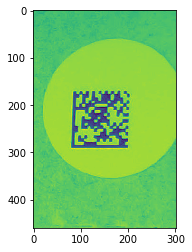

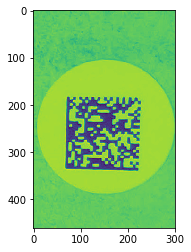

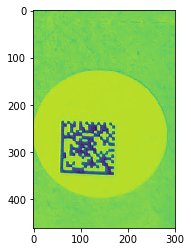

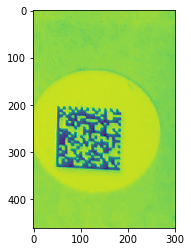

None

There is a hook that makes Jupyter Notebook always show the last pyplot figure, regardless of display()


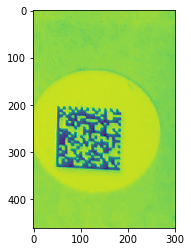

In [102]:
reload(boxscanner)
grid_params = (0.02, None, 0.03, None, (4, 1))
imgrid = boxscanner.segment_image_to_grid(image, grid_params)
# print(imgrid)
for row in imgrid:
    for img in row:
        display(pyplot.imshow(img).figure)
display(None)
print("There is a hook that makes Jupyter Notebook always show the last pyplot figure, regardless of display()")

# display(pyplot.imshow(imgrid[0][0]).figure)
# display(pyplot.imshow(imgrid[1][0]).figure)
# display(pyplot.imshow(imgrid[2][0]).figure)
# display(pyplot.imshow(imgrid[3][0]).figure)


In [95]:
reload(boxscanner)
grid_params = (20, -5, 10, -1, (4, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)

image.shape (1880, 357)
im_cropped.shape: (1855, 346)
nrows, ncols: 4 1
height, width: 1855 346


[['190728 RS123d2 S2Descr'],
 ['20190729 RS123d1 Sample, Test description'],
 ['190728 RS123d2 S2Descr'],
 ['20190729 RS123d1 Sample Test description']]

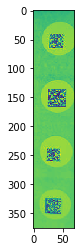

In [47]:
pyplot.imshow(image)

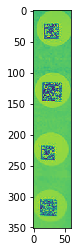

In [62]:
pyplot.imshow(image[20:-5, 10:])

In [126]:
# Reduced to 50%, then upscaled 4x: Works OK.
image_filename = example_data_dir / "datamatrix_x1_50pct-up4x-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (476, 464)
im_cropped.shape: (476, 464)
nrows, ncols: 1 1
height, width: 476 464


[['190728 RS123d2 S2Descr']]

In [128]:
# Reduced to 50%, then upscaled 4x, then gauss-blur=3: Works OK.
image_filename = example_data_dir / "datamatrix_x1_50pct-up4x-gb3-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (476, 464)
im_cropped.shape: (476, 464)
nrows, ncols: 1 1
height, width: 476 464


[['190728 RS123d2 S2Descr']]

In [133]:
# Single barcode, reduced to 20%: Does not work.
# ("Resample, Lanczos", but with "Use fast Resample filter for image shrinking" enabled. No sharpening.)
image_filename = example_data_dir / "datamatrix_x1_02_20pct-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (81, 80)
im_cropped.shape: (81, 80)
nrows, ncols: 1 1
height, width: 81 80


[[None]]

In [134]:
# Single barcode, reduced to 20%, then upscaled 5x: Works.
# ("Resample, Lanczos", but with "Use fast Resample filter for image shrinking" enabled. No sharpening.)
image_filename = example_data_dir / "datamatrix_x1_02_20pct-up5x-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (405, 400)
im_cropped.shape: (405, 400)
nrows, ncols: 1 1
height, width: 405 400


[['20190729 RS123d1 Sample Test description']]

In [135]:
# Single barcode, reduced to 20%, then upscaled 4x: Doesn't work.
# ("Resample, Lanczos", but with "Use fast Resample filter for image shrinking" enabled. No sharpening.)
image_filename = example_data_dir / "datamatrix_x1_02_20pct-up4x-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (324, 320)
im_cropped.shape: (324, 320)
nrows, ncols: 1 1
height, width: 324 320


[[None]]

In [139]:
# Single barcode, reduced to 20%, then upscaled 4x plus gaussian-blur: Doesn't work
# ("Resample, Lanczos", but with "Use fast Resample filter for image shrinking" enabled. No sharpening.)
image_filename = example_data_dir / "datamatrix_x1_02_20pct-up4x-gb2-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (324, 320)
im_cropped.shape: (324, 320)
nrows, ncols: 1 1
height, width: 324 320


[[None]]

In [138]:
# Single barcode, reduced to 20%, then upscaled 4x plus fast-gaussian-blur: Doesn't work
# ("Resample, Lanczos", but with "Use fast Resample filter for image shrinking" enabled. No sharpening.)
image_filename = example_data_dir / "datamatrix_x1_02_20pct-up4x-fgb3-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (324, 320)
im_cropped.shape: (324, 320)
nrows, ncols: 1 1
height, width: 324 320


[[None]]

In [137]:
# Single barcode, reduced to 20%, then upscaled 8x: Works.
# ("Resample, Lanczos", but with "Use fast Resample filter for image shrinking" enabled. No sharpening.)
image_filename = example_data_dir / "datamatrix_x1_02_20pct-up8x-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (648, 640)
im_cropped.shape: (648, 640)
nrows, ncols: 1 1
height, width: 648 640


[['20190729 RS123d1 Sample Test description']]

In [132]:
# Single barcode, reduced to 25%: WORKS.
# ("Resample, Lanczos", but with "Use fast Resample filter for image shrinking" enabled. No sharpening.)
image_filename = example_data_dir / "datamatrix_x1_02_25pct-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (101, 100)
im_cropped.shape: (101, 100)
nrows, ncols: 1 1
height, width: 101 100


[['20190729 RS123d1 Sample Test description']]

In [129]:
# Reduced to 25%, then upscaled 4x
image_filename = example_data_dir / "datamatrix_x1_02_25pct-up4x-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (404, 400)
im_cropped.shape: (404, 400)
nrows, ncols: 1 1
height, width: 404 400


[['20190729 RS123d1 Sample Test description']]

In [130]:
# Reduced to 25%, then upscaled 5x
image_filename = example_data_dir / "datamatrix_x1_02_25pct-up5x-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (505, 500)
im_cropped.shape: (505, 500)
nrows, ncols: 1 1
height, width: 505 500


[['20190729 RS123d1 Sample Test description']]

In [131]:
# Reduced to 25%, then upscaled 5x, then fast-gaussian-blur
image_filename = example_data_dir / "datamatrix_x1_02_25pct-up5x-fgb5-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)


image.shape (505, 500)
im_cropped.shape: (505, 500)
nrows, ncols: 1 1
height, width: 505 500


[['20190729 RS123d1 Sample Test description']]

In [ ]:
# Reduced to 25%, then upscaled 5x, then fast-gaussian-blur
image_filename = example_data_dir / "datamatrix_x1_02_25pct-up5x-fgb5-q90.jpg"
image = PIL.Image.open(image_filename)
reload(boxscanner)
grid_params = (None, None, None, None, (1, 1))
boxscanner.scan_barcodes_in_grid(image, grid_params)
